# Using default replacement to NaN

## Load libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [6]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
import graphviz

# Load data

In [7]:
phishing_data = pd.read_csv('phishing_final.csv')
resultTarget = phishing_data["Result"]
# resultTarget.value_counts().argmax()

In [8]:
# dataframe that will apply a default label to replace NaN
phishingWithDefaultReplacement = phishing_data.copy(deep=True)


# Understanding dataset

In [9]:
# Display first 5 sample rows of data
phishing_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,NaN,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,No,Yes,No,Yes,Short,No,Medium,NaN,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,No,Yes,Medium,High,NaN,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,NaN,High,Yes,Some links,Reported,Phish
3,Yes,NaN,Yes,NaN,Yes,No,One,Long,Yes,Yes,Yes,No,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,No,Yes,Medium,NaN,Some,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish


In [10]:
# A summary table of the dataset
phishing_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,9947,9937,9957,9952,11055,11055,11055,11055,11055,9972,9976,9956,9948,9977,9950,11055,11055,11055,11055,11055,11055,9971,9934,9941,9982,9961,11055,11055,10001
unique,2,3,2,2,2,2,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,Yes,Short,Yes,Yes,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,Some links,Reported,Phish
freq,7262,8078,8641,8474,8649,9590,4070,7389,9002,9553,8335,5908,4833,4021,7602,8126,9426,9776,9740,10579,8918,10043,5316,6832,5244,7382,8562,6156,9505,5560


In [11]:
# Number of rows with NaN result
print(f'Number of rows without the result: {phishing_data[phishing_data.Result.isnull()].shape[0]}')

Number of rows without the result: 1054


## Observation

Result has NaN => dont know the outcome => drop row

Several columns have NaN result

In [12]:
# drop unknown result:
phishing_data = phishing_data[~phishing_data['Result'].isnull()]
phishing_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,NaN,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,No,Yes,No,Yes,Short,No,Medium,NaN,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,No,Yes,Medium,High,NaN,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,NaN,High,Yes,Some links,Reported,Phish
3,Yes,NaN,Yes,NaN,Yes,No,One,Long,Yes,Yes,Yes,No,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,No,Yes,Medium,NaN,Some,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish


In [13]:
phishing_data.shape

(10001, 30)

In [14]:
phishing_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,10001,8990,8974,9019,8987,10001,10001,10001,10001,10001,9019,9028,9007,8993,9027,8997,10001,10001,10001,10001,10001,10001,9029,8991,8988,9041,9008,10001,10001,10001
unique,2,3,2,2,2,2,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,Yes,Short,Yes,Yes,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,Some links,Reported,Phish
freq,6567,7285,7811,7686,7810,8664,3688,6662,8142,8641,7546,5343,4371,3635,6892,7373,8543,8835,8799,9561,8070,9070,4816,6186,4741,6691,7728,5551,8595,5560


some missing data: 8974 ~ 10001

## Visualize the original dataframe

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

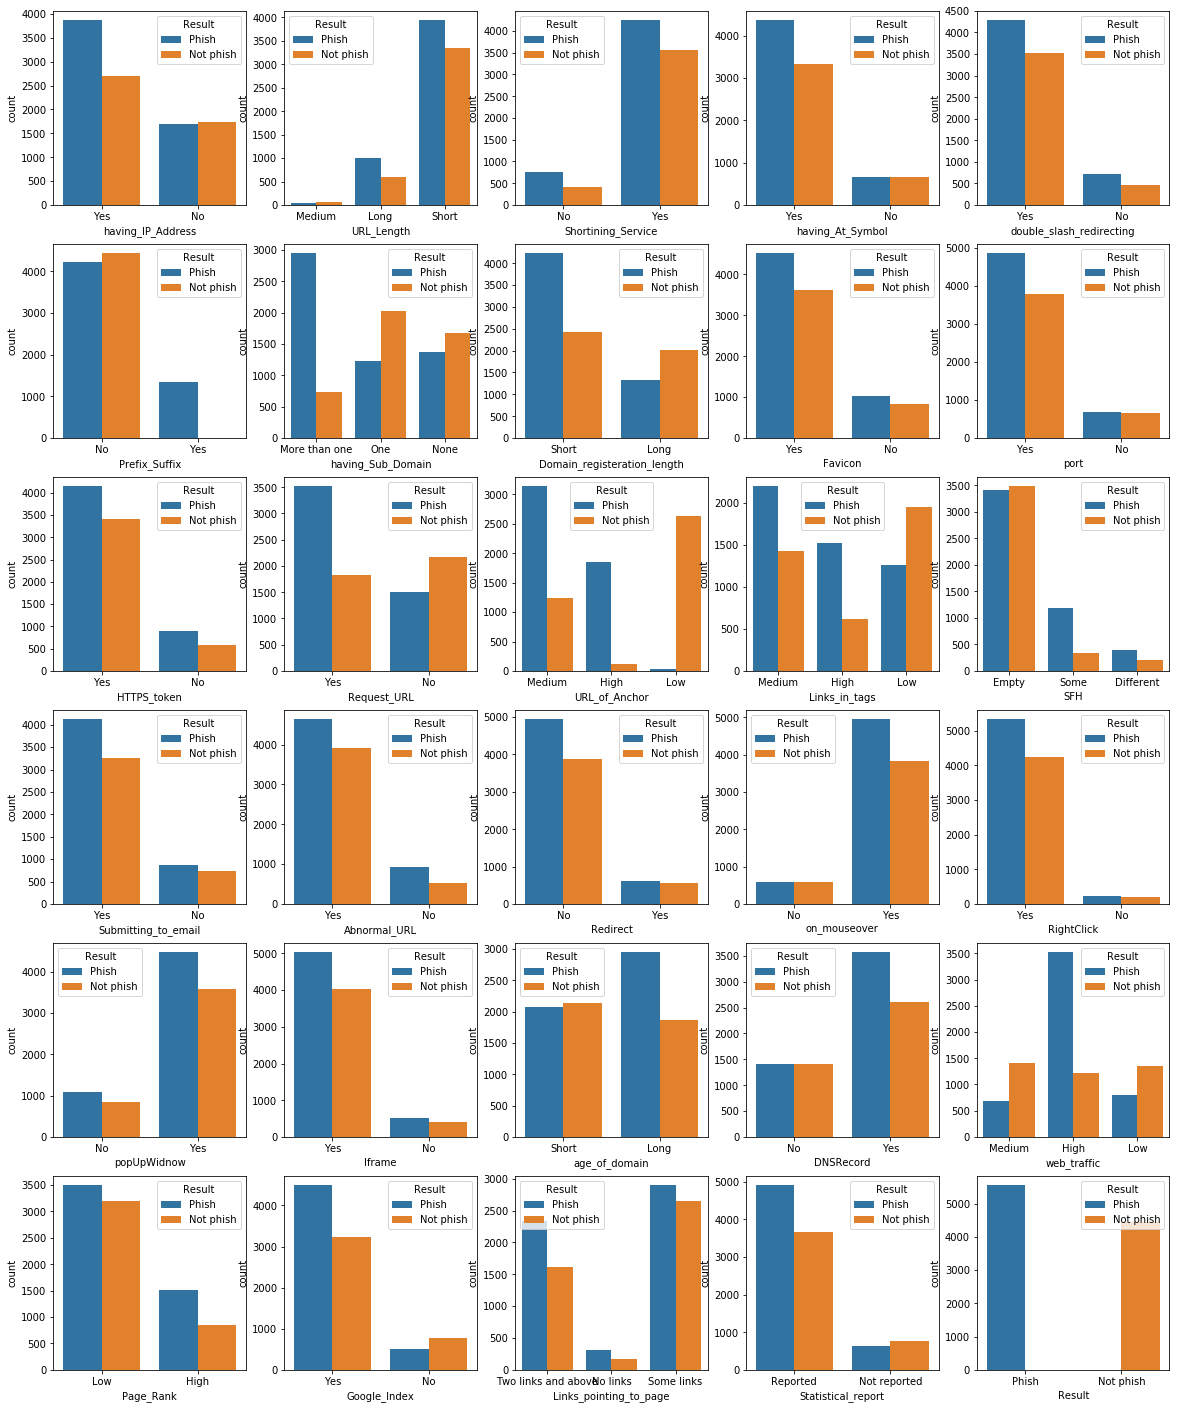

In [17]:
columns_plot = np.array(phishing_data.columns).reshape(6, 5)
plt.subplots_adjust(left  = 0.3, right = 0.9, bottom = 0.2, top = 0.9, wspace = 0.3, hspace = 0.3)

f, axes = plt.subplots(6, 5, figsize=(20, 25))

for x in range(6):
    for y in range(5):
        sns.countplot(x=columns_plot[x][y], hue='Result', data=phishing_data, ax=axes[x][y])

## from data distribution:
    Data is not bias.
    first layer entropy important features: 
        URL-Anchor, Prefix, LinkinTag, webTrafic, DomainLength...

# Preprocess 
## fill NaN using default value

In [18]:
dataFrame = phishingWithDefaultReplacement


In [19]:
# function to get column names which contain NaN values
def columnsContainNaN (df):
    result = df.columns[df.isna().any()].tolist()
    return result
# columnsContainNaN(phising_data)

In [20]:
# function to fill NaN with a certain value:
def fillNaN (df, value):    
    for column in df.columns.tolist() :
        df[column] = df[column].fillna(value)
    return df
# fillNaN(phising_data.drop("URL_Length", axis=1),"default")

In [23]:
#     spliting target, features
target = dataFrame["Result"]
#     print(target)
remainFeatures = dataFrame.drop(columns=["Result"])
#     fill nan features by default label, that helps RFC model to work
remainFeatures = fillNaN(remainFeatures,"default")
#     print(column in remainFeatures.columns.tolist())
#     combine
dataFrame = remainFeatures.join(target)


In [24]:
# check result
columnsContainNaN(dataFrame)

['Result']

# Split data

In [25]:
# drop unknown result:
dataFrame = dataFrame[~dataFrame['Result'].isnull()]


In [26]:
# split features and target
# the dataframe that use default method
phishingDF_X, phishingDF_y =  dataFrame.drop('Result', axis=1), dataFrame['Result']


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [30]:
# encoding labels
# to avoid side-effect on the input dataframe, make a deep copy
def encodingDF (df):    
    dataframe = df
    for column in dataframe.columns.tolist() :
        dataframe[column] = LabelEncoder().fit_transform(dataframe[column])      
    return dataframe


In [31]:
trainDF_X, testDF_X, trainDF_y, testDF_y = train_test_split(encodingDF(phishingDF_X), 
            phishingDF_y, test_size=0.3, stratify = phishingDF_y, random_state=42)
# todo: check best test_size

### first train and evaluate

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf_rand = RandomForestClassifier().fit(trainDF_X, trainDF_y)
clf_ada = AdaBoostClassifier().fit(trainDF_X, trainDF_y)
clf_bagging = BaggingClassifier().fit(trainDF_X, trainDF_y)
clf_grad= GradientBoostingClassifier().fit(trainDF_X, trainDF_y)
clf_tree = DecisionTreeClassifier().fit(trainDF_X, trainDF_y)

/Users/donbosco/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
predictions_rand = clf_rand.predict(testDF_X)
predictions_ada = clf_ada.predict(testDF_X)
predictions_bagging = clf_bagging.predict(testDF_X)
predictions_grad = clf_grad.predict(testDF_X)
predictions_tree = clf_tree.predict(testDF_X)

In [35]:
from sklearn.metrics import classification_report


In [36]:

print("random forest classifier : \n",classification_report(testDF_y, predictions_rand))
print("ada classifier : \n",classification_report(testDF_y, predictions_ada))
print("bagging classifier : \n",classification_report(testDF_y, predictions_bagging))
print("grad classifier : \n",classification_report(testDF_y, predictions_grad))
print("tree classifier : \n",classification_report(testDF_y, predictions_tree))

random forest classifier : 
               precision    recall  f1-score   support

   Not phish       0.88      0.92      0.90      1333
       Phish       0.93      0.90      0.92      1668

   micro avg       0.91      0.91      0.91      3001
   macro avg       0.91      0.91      0.91      3001
weighted avg       0.91      0.91      0.91      3001

ada classifier : 
               precision    recall  f1-score   support

   Not phish       0.88      0.84      0.86      1333
       Phish       0.88      0.91      0.89      1668

   micro avg       0.88      0.88      0.88      3001
   macro avg       0.88      0.88      0.88      3001
weighted avg       0.88      0.88      0.88      3001

bagging classifier : 
               precision    recall  f1-score   support

   Not phish       0.88      0.89      0.88      1333
       Phish       0.91      0.90      0.91      1668

   micro avg       0.90      0.90      0.90      3001
   macro avg       0.89      0.90      0.90      3001
wei

#### check the importance features

No handles with labels found to put in legend.


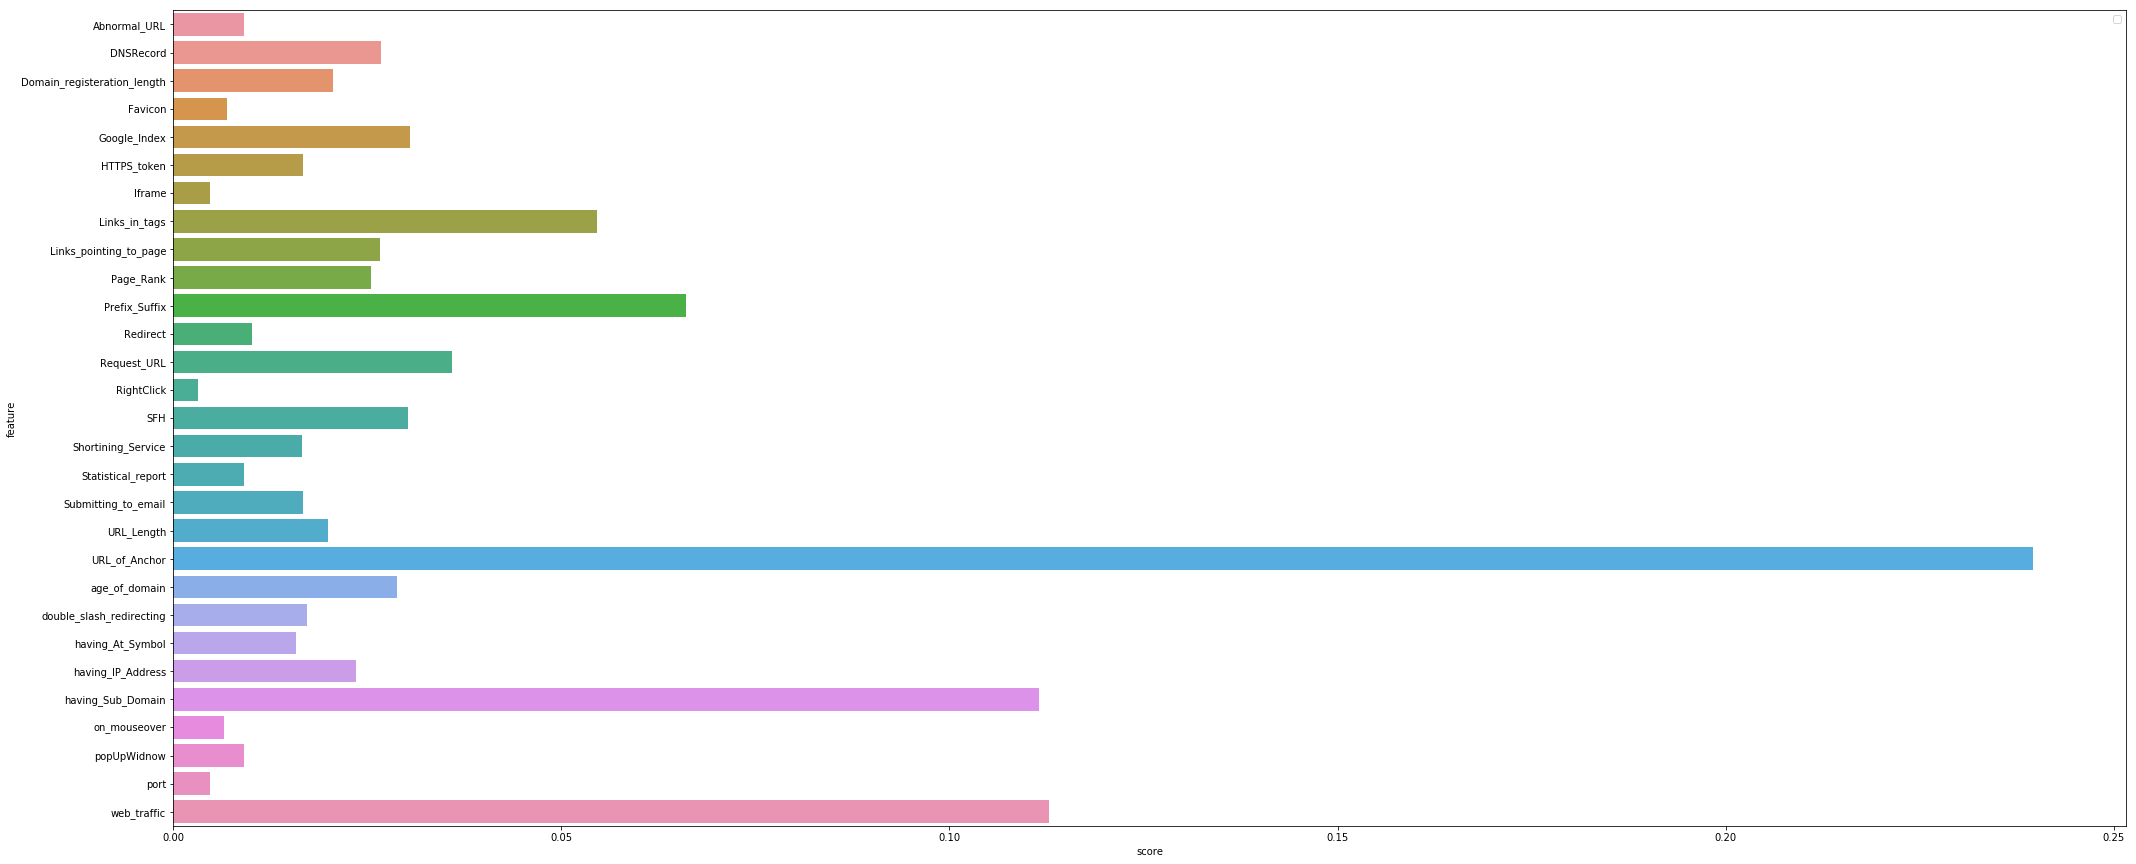

In [38]:
# suggestions from random forest tree
fi_rand = pd.DataFrame(sorted(zip(dataFrame.columns,
                            map(lambda x: round(x, 4), clf_rand.feature_importances_))), 
                       columns=['feature', 'score'])
fig, ax = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(x='score', y='feature', data=fi_rand, ax=ax)
ax.legend()

### features selection:

In [43]:
from sklearn import metrics

In [44]:
# function to train a model with train and test set, with selected features
# params:
#     model: model want to train (here we use classifier models)
#     trainX,trainY,testX,testY: dataframe
#     features: features that the model will be trained on
# output: 
#     trained model and evaluation report
def trainAndReportWithFeatures(model, trainX,trainY,testX,testY,features):
    trainedModel = model.fit(trainX[features],trainY)
    predictions = trainedModel.predict(testX[features])
#     report = classification_report(testY, predictions, output_dict=True)
    report = classification_report(testY, predictions)
    accuracy = metrics.accuracy_score(testY,predictions)
    rocAuc = metrics.roc_auc_score(testY,trainedModel.predict_proba(testX[features])[:, 1])
#     print(report)
    return (trainedModel,report,accuracy,rocAuc)

In [45]:
# function to train a model, with train and test set, under suggestion of another model, with selected feature amount
# params:
#     needTrainModel: model want to train (here we use decision tree)
#     trainedRFmodel: model to evaluate feature importances (here we use random forest tree)
#     trainX,trainY,testX,testY, dataframe : (input here so that data will not change)
#     n: amount of features that the model will be trained on, base on importance level
# output: 
#     trained model and evaluation report
def selectFeature(trainedRFmodel, needTrainModel ,dataFrame,trainX,trainY,testX,testY,n):
    fi_rand = pd.DataFrame(sorted(zip(dataFrame.columns,
                                 map(lambda x: round(x, 4), trainedRFmodel.feature_importances_))),
                           columns=['feature', 'score'])
    fi_rand = fi_rand.sort_values(by="score",ascending=False)
    fi_rand_filted = list(filter(lambda item: item != "Result", fi_rand["feature"].ravel()))
    if n > len(fi_rand_filted) : return (0,0)
    features = fi_rand_filted[:n]
    (trainedModel, report,accuracy,rocAuc) = trainAndReportWithFeatures(needTrainModel, trainX,trainY,testX,testY,features)
    print("features selected: ",features)
    print("report: ",report)
    print("accuracy: ",accuracy)
    print("roc auc score: ",rocAuc)
    return (trainedModel,report)

In [49]:
# 1 feature
a1= selectFeature(clf_rand,clf_tree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,1)

features selected:  ['URL_of_Anchor']
report:                precision    recall  f1-score   support

   Not phish       0.99      0.59      0.74      1333
       Phish       0.75      1.00      0.86      1668

   micro avg       0.81      0.81      0.81      3001
   macro avg       0.87      0.79      0.80      3001
weighted avg       0.86      0.81      0.80      3001

accuracy:  0.8147284238587138
roc auc score:  0.8561097108809577


In [50]:
# 2 features
a2= selectFeature(clf_rand,clf_tree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,2)

features selected:  ['URL_of_Anchor', 'web_traffic']
report:                precision    recall  f1-score   support

   Not phish       0.83      0.76      0.79      1333
       Phish       0.82      0.87      0.85      1668

   micro avg       0.82      0.82      0.82      3001
   macro avg       0.82      0.82      0.82      3001
weighted avg       0.82      0.82      0.82      3001

accuracy:  0.8227257580806397
roc auc score:  0.8836267070364714


In [51]:
# 5 features
a5= selectFeature(clf_rand,clf_tree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,5)

features selected:  ['URL_of_Anchor', 'web_traffic', 'having_Sub_Domain', 'Prefix_Suffix', 'Links_in_tags']
report:                precision    recall  f1-score   support

   Not phish       0.85      0.84      0.85      1333
       Phish       0.87      0.89      0.88      1668

   micro avg       0.87      0.87      0.87      3001
   macro avg       0.86      0.86      0.86      3001
weighted avg       0.87      0.87      0.87      3001

accuracy:  0.8653782072642453
roc auc score:  0.9383373271375397


In [52]:
# 9 features
a9= selectFeature(clf_rand,clf_tree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,9)

features selected:  ['URL_of_Anchor', 'web_traffic', 'having_Sub_Domain', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'Google_Index', 'SFH', 'age_of_domain']
report:                precision    recall  f1-score   support

   Not phish       0.84      0.86      0.85      1333
       Phish       0.89      0.87      0.88      1668

   micro avg       0.87      0.87      0.87      3001
   macro avg       0.86      0.87      0.87      3001
weighted avg       0.87      0.87      0.87      3001

accuracy:  0.8667110963012329
roc auc score:  0.9018007649394362


In [53]:
# 20 features
a20= selectFeature(clf_rand,clf_tree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,20)

features selected:  ['URL_of_Anchor', 'web_traffic', 'having_Sub_Domain', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'Google_Index', 'SFH', 'age_of_domain', 'DNSRecord', 'Links_pointing_to_page', 'Page_Rank', 'having_IP_Address', 'Domain_registeration_length', 'URL_Length', 'double_slash_redirecting', 'Submitting_to_email', 'HTTPS_token', 'Shortining_Service', 'having_At_Symbol']
report:                precision    recall  f1-score   support

   Not phish       0.84      0.86      0.85      1333
       Phish       0.89      0.87      0.88      1668

   micro avg       0.87      0.87      0.87      3001
   macro avg       0.87      0.87      0.87      3001
weighted avg       0.87      0.87      0.87      3001

accuracy:  0.8683772075974675
roc auc score:  0.871012267455353


In [54]:
# 27 features
a27= selectFeature(clf_rand,clf_tree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,27)

features selected:  ['URL_of_Anchor', 'web_traffic', 'having_Sub_Domain', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'Google_Index', 'SFH', 'age_of_domain', 'DNSRecord', 'Links_pointing_to_page', 'Page_Rank', 'having_IP_Address', 'Domain_registeration_length', 'URL_Length', 'double_slash_redirecting', 'Submitting_to_email', 'HTTPS_token', 'Shortining_Service', 'having_At_Symbol', 'Redirect', 'Statistical_report', 'popUpWidnow', 'Abnormal_URL', 'Favicon', 'on_mouseover', 'Iframe']
report:                precision    recall  f1-score   support

   Not phish       0.85      0.87      0.86      1333
       Phish       0.90      0.88      0.89      1668

   micro avg       0.88      0.88      0.88      3001
   macro avg       0.87      0.88      0.87      3001
weighted avg       0.88      0.88      0.88      3001

accuracy:  0.8760413195601466
roc auc score:  0.8765091452719294


In [55]:
# 28 features
a28= selectFeature(clf_rand,clf_tree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,28)

features selected:  ['URL_of_Anchor', 'web_traffic', 'having_Sub_Domain', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'Google_Index', 'SFH', 'age_of_domain', 'DNSRecord', 'Links_pointing_to_page', 'Page_Rank', 'having_IP_Address', 'Domain_registeration_length', 'URL_Length', 'double_slash_redirecting', 'Submitting_to_email', 'HTTPS_token', 'Shortining_Service', 'having_At_Symbol', 'Redirect', 'Statistical_report', 'popUpWidnow', 'Abnormal_URL', 'Favicon', 'on_mouseover', 'Iframe', 'port']
report:                precision    recall  f1-score   support

   Not phish       0.85      0.87      0.86      1333
       Phish       0.89      0.87      0.88      1668

   micro avg       0.87      0.87      0.87      3001
   macro avg       0.87      0.87      0.87      3001
weighted avg       0.87      0.87      0.87      3001

accuracy:  0.8710429856714429
roc auc score:  0.8716279789371804


### customize decisionTree

## using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [59]:
def bestTreeGSCV(treeModel,trainX,trainY):
    maxDepths = range(5,30,5)
    minImpurityDecreeses = range(0,5)
    minSampleSplit = range(1,80)
    param_grid = {'criterion':['gini','entropy'], 
              'max_features' : ['log2','auto','sqrt',0.5,1.0],
              'max_depth' :maxDepths,
              'min_impurity_decrease' :[0.0,0.1,0.2,0.3],
              'min_samples_split': [5,10,30,50,80],
              'min_samples_leaf' : [5,10,30,50]
             }
    gs_inst = GridSearchCV(treeModel,param_grid=param_grid,cv=5, return_train_score=True)
    gs_inst.fit(trainX,trainY)
    return gs_inst.best_estimator_


In [60]:
bestTree = bestTreeGSCV(DecisionTreeClassifier(),trainDF_X, trainDF_y)
bestTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
best28features= selectFeature(clf_rand,bestTree,dataFrame,trainDF_X, trainDF_y, testDF_X, testDF_y,27)

features selected:  ['URL_of_Anchor', 'web_traffic', 'having_Sub_Domain', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'Google_Index', 'SFH', 'age_of_domain', 'DNSRecord', 'Links_pointing_to_page', 'Page_Rank', 'having_IP_Address', 'Domain_registeration_length', 'URL_Length', 'double_slash_redirecting', 'Submitting_to_email', 'HTTPS_token', 'Shortining_Service', 'having_At_Symbol', 'Redirect', 'Statistical_report', 'popUpWidnow', 'Abnormal_URL', 'Favicon', 'on_mouseover', 'Iframe']
report:                precision    recall  f1-score   support

   Not phish       0.86      0.86      0.86      1333
       Phish       0.89      0.88      0.89      1668

   micro avg       0.87      0.87      0.87      3001
   macro avg       0.87      0.87      0.87      3001
weighted avg       0.87      0.87      0.87      3001

accuracy:  0.8740419860046651
roc auc score:  0.9480681771162215
